Nama : Jonathan Christopher Gani  
NIM : 2702223084


# DATASET B

# Link Video :
https://drive.google.com/drive/folders/1lAb1PF4pGGk6OZla5q_uKEhlcEsuxPkR?usp=sharing

# Estimate Productivity Each Team in a Garment Factory

# 1. A

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, BatchNormalization

In [2]:
dataset = pd.read_parquet("dataset_1B.parquet")  # read file with parquet extension
dataset

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score
0,1/1/2015,Quarter1,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,94.073
1,1/1/2015,Quarter1,Thursday,1,3.94,NaN,960,0,0.0,0,0,8.0,88.650
2,1/1/2015,Quarter1,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,80.057
3,1/1/2015,Quarter1,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,80.057
4,1/1/2015,Quarter1,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,80.038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2016-03-10,Quarter2,Wednesday,10,2.90,NaN,960,0,0.0,0,0,8.0,62.833
1193,2016-03-10,Quarter2,Wednesday,8,3.90,NaN,960,0,0.0,0,0,8.0,62.562
1194,2016-03-10,Quarter2,Wednesday,7,3.90,NaN,960,0,0.0,0,0,8.0,62.562
1195,2016-03-10,Quarter2,Wednesday,9,2.90,NaN,1800,0,0.0,0,0,15.0,50.589


## Dataset Information

Goal: Estimate the productivity score for each team in a garment factory!

- date: Date of the assessment
- day: Day of the Week
- quarter: The quarter of the year when the data was recorded (e.g., Quarter1, Quarter2)
- Team Code: A unique identifier for the team.
- smv: Standard Minute Value, a measure of the time allocated for a task.
- wip: Work In Progress, the number of products that are unfinished.
- over_time: The amount of overtime worked, measured in minutes.
- incentive: The incentive provided to the workers, measured in USD.
- idle_time: The amount of time workers were idle, measured in minutes.
- idle_men: The number of workers who were idle.
- no_of_style_change: The number of style changes that occurred.
- no_of_workers: The total number of workers.
- productivity_score: The productivity score of the team, measured as a percentage.

In [3]:
dataset.shape

(1197, 13)

In [4]:
dataset.columns

Index(['date', 'quarter', 'day', 'Team Code', 'smv', 'wip', 'over_time',
       'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'productivity_score'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1197 non-null   object 
 1   quarter             1197 non-null   object 
 2   day                 1197 non-null   object 
 3   Team Code           1197 non-null   int64  
 4   smv                 1197 non-null   float64
 5   wip                 691 non-null    float64
 6   over_time           1197 non-null   int64  
 7   incentive           1197 non-null   int64  
 8   idle_time           1197 non-null   float64
 9   idle_men            1197 non-null   int64  
 10  no_of_style_change  1197 non-null   int64  
 11  no_of_workers       1197 non-null   float64
 12  productivity_score  1197 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 121.7+ KB


In [6]:
dataset.describe()

,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score
count,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.337510,73.367040
std,3.463963,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.617043,18.154945
min,1.000000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-57.000000,-100.000000
25%,3.000000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,65.030000
50%,6.000000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,77.333000
75%,9.000000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,85.025000
max,12.000000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,112.044000


We can see, this dataset consist of 1197 rows with total 13 columns, and then there's a list from each column name, and then simple information about the data types and missing values, here detected there are some missing values in "wip" column, but all the data types are already appropriate. And then describe function to show the statistical summary only for numerical columns.

## Converting date Data Types


In [7]:
dataset['date'] = pd.to_datetime(dataset['date'], format='mixed')
dataset['month'] = dataset['date'].dt.month
dataset['year'] = dataset['date'].dt.year
dataset = dataset.drop(columns=['date'])

In [8]:
dataset

,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score,month,year
0,Quarter1,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,94.073,1,2015
1,Quarter1,Thursday,1,3.94,NaN,960,0,0.0,0,0,8.0,88.650,1,2015
2,Quarter1,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,80.057,1,2015
3,Quarter1,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,80.057,1,2015
4,Quarter1,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,80.038,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,Wednesday,10,2.90,NaN,960,0,0.0,0,0,8.0,62.833,3,2016
1193,Quarter2,Wednesday,8,3.90,NaN,960,0,0.0,0,0,8.0,62.562,3,2016
1194,Quarter2,Wednesday,7,3.90,NaN,960,0,0.0,0,0,8.0,62.562,3,2016
1195,Quarter2,Wednesday,9,2.90,NaN,1800,0,0.0,0,0,15.0,50.589,3,2016


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   quarter             1197 non-null   object 
 1   day                 1197 non-null   object 
 2   Team Code           1197 non-null   int64  
 3   smv                 1197 non-null   float64
 4   wip                 691 non-null    float64
 5   over_time           1197 non-null   int64  
 6   incentive           1197 non-null   int64  
 7   idle_time           1197 non-null   float64
 8   idle_men            1197 non-null   int64  
 9   no_of_style_change  1197 non-null   int64  
 10  no_of_workers       1197 non-null   float64
 11  productivity_score  1197 non-null   float64
 12  month               1197 non-null   int32  
 13  year                1197 non-null   int32  
dtypes: float64(5), int32(2), int64(5), object(2)
memory usage: 121.7+ KB


Converting the column date to date time types, because the date format is inconsistent and i need a numerical type in modelling. And then make and extract the month and year column, and then drop the "date" col. Here we can see the data type of month and year column are already in numerical type.

## Checking Categorical Column Unique Data

In [10]:
dataset["quarter"].value_counts()

,count
quarter,
Quarter1,360
Quarter2,335
Quarter4,248
Quarter3,210
Quarter5,44


In [11]:
dataset["day"].value_counts()

,count
day,
Wednesday,208
Sunday,203
Tuesday,201
Thursday,199
Monday,199
Saturday,187


In [12]:
dataset.drop(dataset[dataset['quarter'] == 'Quarter5'].index, inplace=True)
dataset

,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score,month,year
0,Quarter1,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,94.073,1,2015
1,Quarter1,Thursday,1,3.94,NaN,960,0,0.0,0,0,8.0,88.650,1,2015
2,Quarter1,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,80.057,1,2015
3,Quarter1,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,80.057,1,2015
4,Quarter1,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,80.038,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,Wednesday,10,2.90,NaN,960,0,0.0,0,0,8.0,62.833,3,2016
1193,Quarter2,Wednesday,8,3.90,NaN,960,0,0.0,0,0,8.0,62.562,3,2016
1194,Quarter2,Wednesday,7,3.90,NaN,960,0,0.0,0,0,8.0,62.562,3,2016
1195,Quarter2,Wednesday,9,2.90,NaN,1800,0,0.0,0,0,15.0,50.589,3,2016


Quarter 5 is an anomaly, because a quarter equals to 3 months, therefore a year should only have 4 quarters, meanwhile the day column are just okay. Here, i also handle the quarter 5 by dropping it away, so the data rows shrink to only 1153 rows with 14 columns.

## Duplicated Values

In [13]:
dataset.duplicated().sum()

np.int64(0)

Checking the total duplication in the data, as we can see the dataset is quite clean in aspect of duplication, therefore none of them needs to be removed

## Missing Values

In [14]:
dataset.isna().sum()

,0
quarter,0
day,0
Team Code,0
smv,0
wip,485
over_time,0
incentive,0
idle_time,0
idle_men,0
no_of_style_change,0


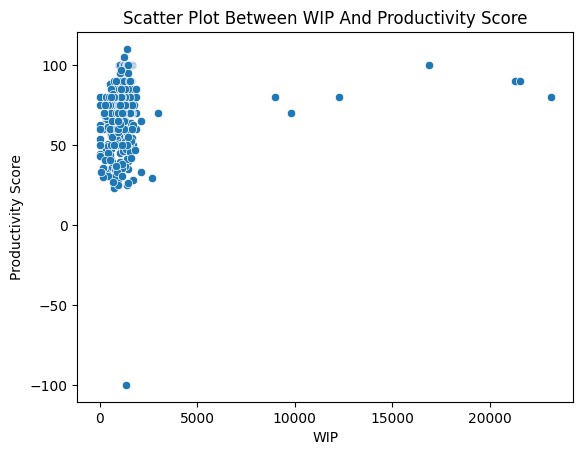

In [15]:
sns.scatterplot(x=dataset['wip'], y=dataset['productivity_score'])
plt.title('Scatter Plot Between WIP And Productivity Score')
plt.xlabel('WIP')
plt.ylabel('Productivity Score')
plt.show()

There are some missing values in "wip" column, here i have 2 options, wether i drop all the missing values, or i'll do the imputation, but i can't drop them all, because it almost 50% of the data, so it would cause lost so much rows. But if i do the imputation, there are so many synthetic data imputed. So the best way is just to drop the wip column instead, because it didn't showing any significant linearity with the predicted value.



In [16]:
dataset.drop(columns=['wip'], inplace=True)
dataset

,quarter,day,Team Code,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score,month,year
0,Quarter1,Thursday,8,26.16,7080,98,0.0,0,0,59.0,94.073,1,2015
1,Quarter1,Thursday,1,3.94,960,0,0.0,0,0,8.0,88.650,1,2015
2,Quarter1,Thursday,11,11.41,3660,50,0.0,0,0,30.5,80.057,1,2015
3,Quarter1,Thursday,12,11.41,3660,50,0.0,0,0,30.5,80.057,1,2015
4,Quarter1,Thursday,6,25.90,1920,50,0.0,0,0,56.0,80.038,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,Wednesday,10,2.90,960,0,0.0,0,0,8.0,62.833,3,2016
1193,Quarter2,Wednesday,8,3.90,960,0,0.0,0,0,8.0,62.562,3,2016
1194,Quarter2,Wednesday,7,3.90,960,0,0.0,0,0,8.0,62.562,3,2016
1195,Quarter2,Wednesday,9,2.90,1800,0,0.0,0,0,15.0,50.589,3,2016


In [17]:
dataset.isna().sum()

,0
quarter,0
day,0
Team Code,0
smv,0
over_time,0
incentive,0
idle_time,0
idle_men,0
no_of_style_change,0
no_of_workers,0


Here, i'm dropping wip column and as we can see, now all the missing values are already cleared (no more missing values).

## Split Into Numerical And Categorical Data

In [18]:
num_cols = []  # list for numerical data
cat_cols = []  # list for categorical data

for i in dataset.columns:
    if 'int' in str(dataset[i].dtype) or 'float' in str(dataset[i].dtype):
        num_cols.append(i)
    else:
        cat_cols.append(i)

print(f"Numerical Cols : {num_cols}")
print(f"Categorical Cols : {cat_cols}")

Numerical Cols : ['Team Code', 'smv', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'productivity_score', 'month', 'year']
Categorical Cols : ['quarter', 'day']


Splitting the data to numerical and categorical in order to simplify the preprocessing later, we can see the data are well separated.

## Check Distributions and Outliers (EDA)

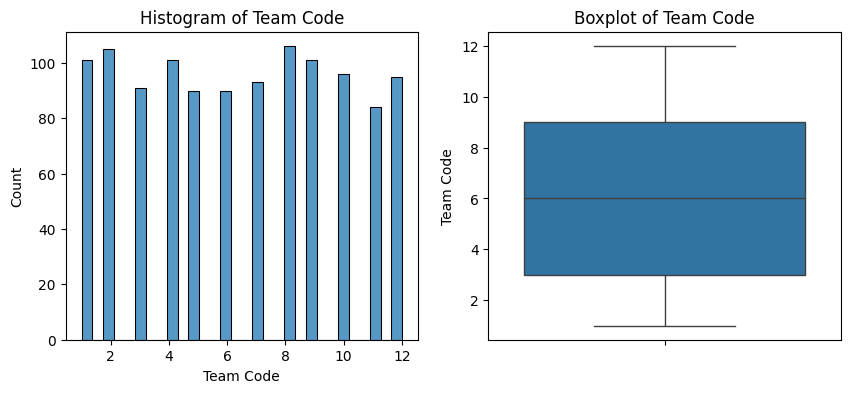

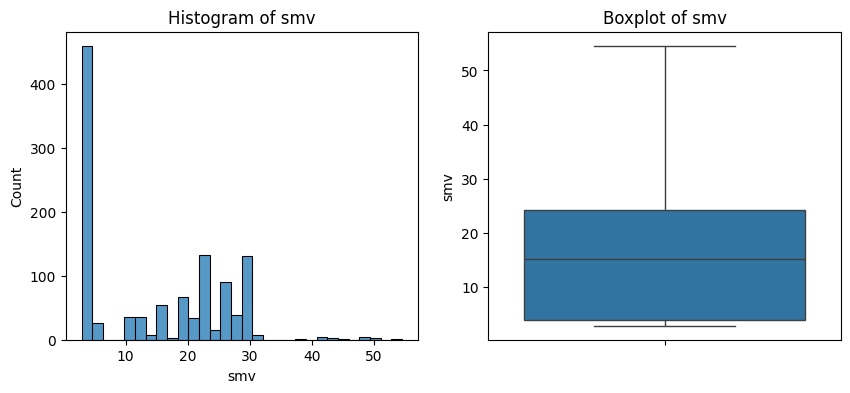

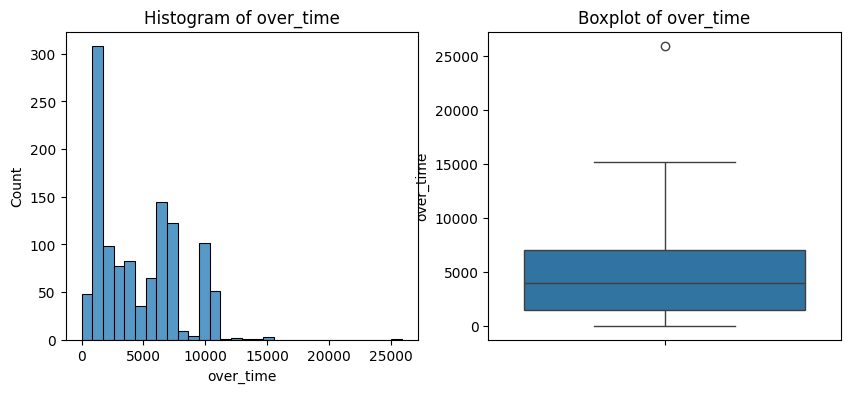

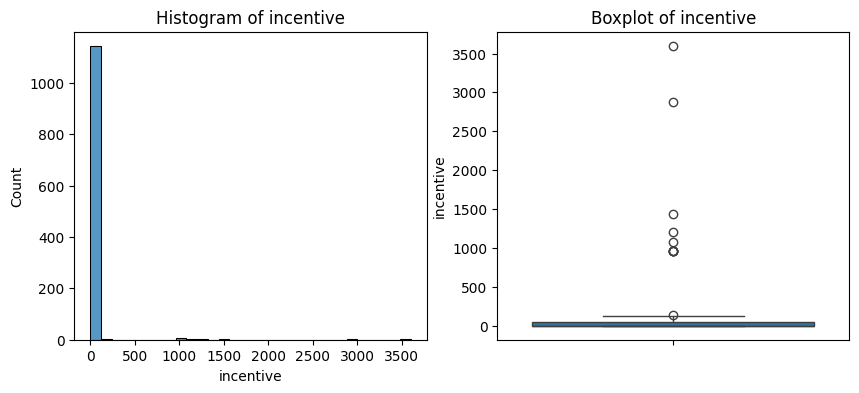

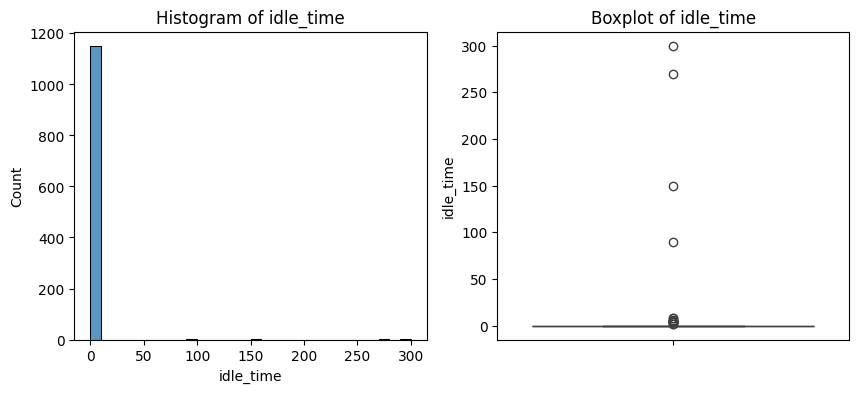

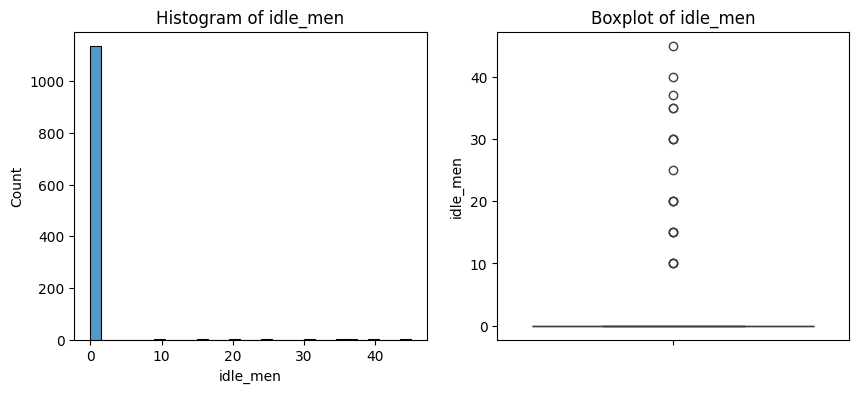

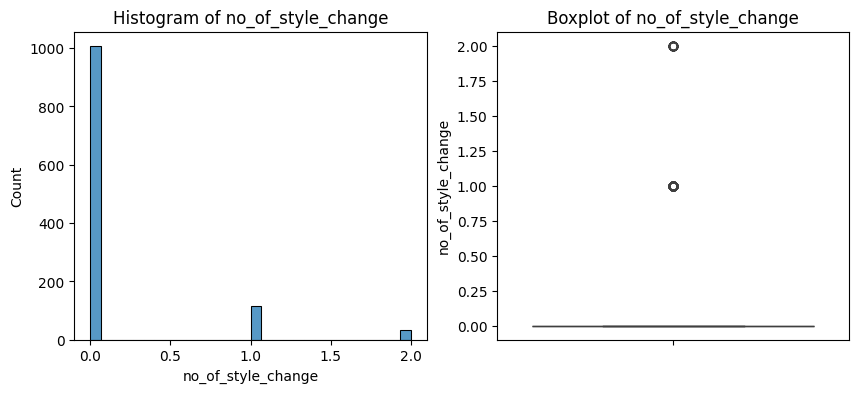

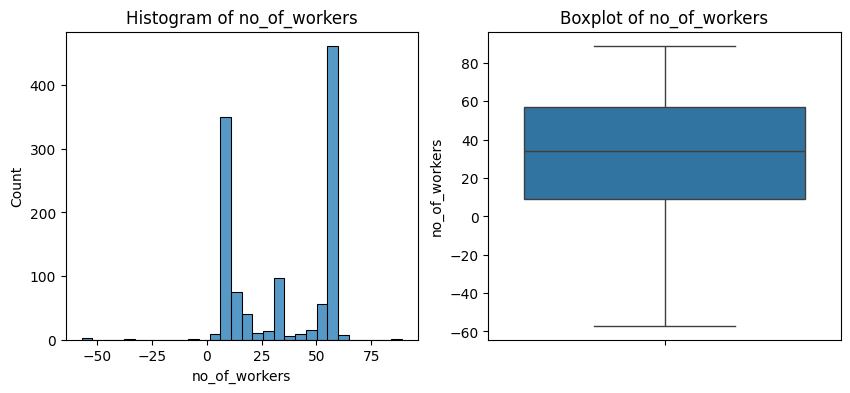

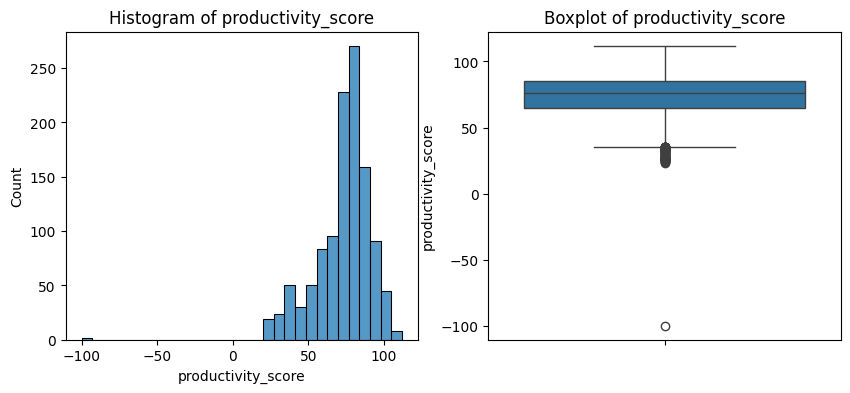

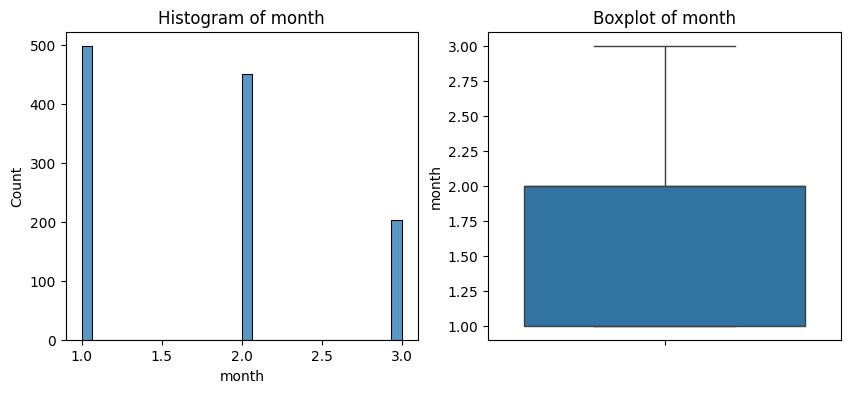

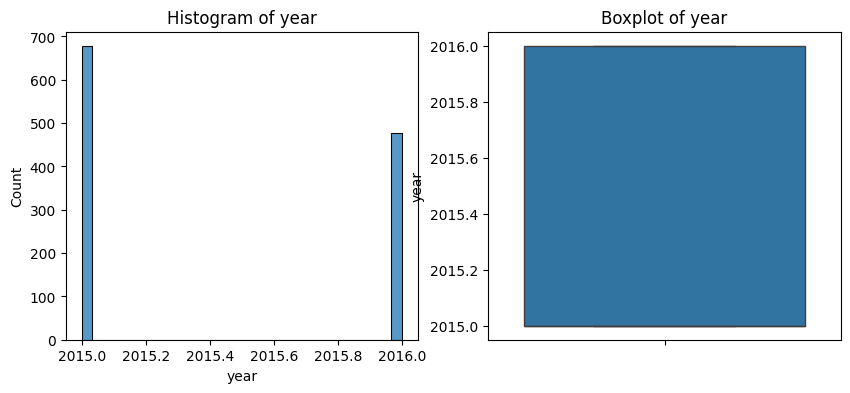

In [19]:
# check outliers and distribution for each numerical columns

def check_outlier_dist_num(df, num):
  for col in num:
    plt.figure(figsize=(10,4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

check_outlier_dist_num(dataset[num_cols], num_cols)

Between all the columns above, some of them are normally distributed and some of them don't. Meanwhile the boxplot are showing some outliers, but i think all the outliers are still quite reasonable and acceptable, therefore i won't remove the outliers.

<ipython-input-20-c5e9e29d2537>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette='Set2')


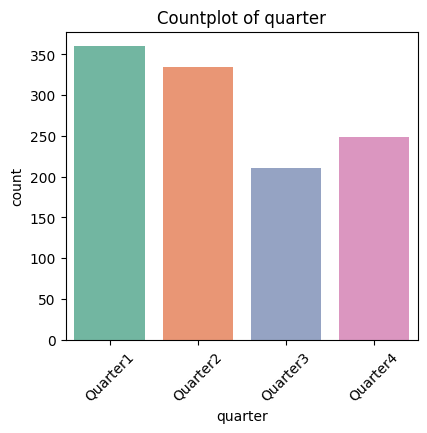

<ipython-input-20-c5e9e29d2537>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette='Set2')


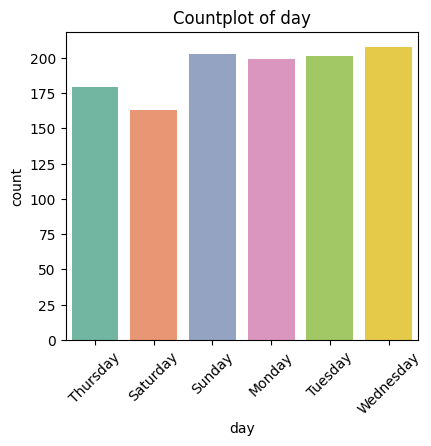

In [20]:
# check outliers and distribution for each categorical columns

def check_outlier_dist_cat(df, cat):
  for col in cat:
    plt.figure(figsize=(10,4))

    plt.subplot(1, 2, 1)
    sns.countplot(df, x=col, palette='Set2')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)

    plt.show()

check_outlier_dist_cat(dataset[cat_cols], cat_cols)

As we can see from both count plot, the distribution between each of them are quite proportional, which means the distributions are quite good.

### Shapiro Test

In [21]:
for i in num_cols:
    if i == 'productivity_score':
        continue

    stat, p = shapiro(dataset[i])
    print(f"{i}: stat = {stat:.4f}, p = {p}")
    if p > 0.05:
        print("Normally Distributed\n")
    else:
        print("Not Normally Distributed\n")


Team Code: stat = 0.9401, p = 3.698255669100194e-21
Not Normally Distributed

smv: stat = 0.8587, p = 6.1247467538444736e-31
Not Normally Distributed

over_time: stat = 0.9048, p = 3.3932795953731516e-26
Not Normally Distributed

incentive: stat = 0.1480, p = 8.640319751572587e-58
Not Normally Distributed

idle_time: stat = 0.0325, p = 5.109440505700779e-60
Not Normally Distributed

idle_men: stat = 0.0928, p = 6.9485953081111415e-59
Not Normally Distributed

no_of_style_change: stat = 0.3976, p = 6.165533406752434e-52
Not Normally Distributed

no_of_workers: stat = 0.7907, p = 4.525872454654735e-36
Not Normally Distributed

month: stat = 0.7833, p = 1.5112629321600842e-36
Not Normally Distributed

year: stat = 0.6255, p = 1.9632724054921062e-44
Not Normally Distributed



As we can see here, non of these numeric columns p value's bigger than 0.05 which means none of them were normally distributed. Therefore i cannot use standard / minmax scaler due to this unnormally distributed data and it has some outliers. So i decided to use robust scaler because it's more robust and has more advantage to deal with this kind of problem.

### EDA Summary
Based on the EDA process i've done the dataset is pretty clean in context duplication, because there are no duplication detected. But there is a little bit issue on the date column, so i change the dtypes and make new columns from it. I also drop the Quarter5 because it's an anomaly. There are also missing values found in wip column. I handled it by dropping the column instead doing imputation. There are also found some outliers, but i think it's still quite reasonable. The data distribution also not really normally distributed, therefore i'll use robust scaler.


## Data Preprocessing

### Outlier Handling
Because all the outliers still seems reasonable and make sense, therefore i won't do anything to handle this

### Selecting Features
Because i'll use all the rest attributes, therefore i don't have to select / drop the unnecessary columns.

## Encoding
Because in machine learning training and modelling only allow to accept numerical data, therefore we should encode the categorical to numerical data types.  
But as we can see from the dataset, the existing categorical data consist of nominal (day) and ordinal (quarter) data.  
Therefore we must treat it differently.

In [22]:
nominal_columns = ["day"]
print(nominal_columns)

['day']


In [23]:
ordinal_columns = ["quarter"]
print(ordinal_columns)

['quarter']


In [24]:
# one hot encoding for the nominal columns
one_hot_encoding = OneHotEncoder(sparse_output=False)
nom_cols_encoded = one_hot_encoding.fit_transform(dataset[nominal_columns])
encoded_nom_dataset = pd.DataFrame(nom_cols_encoded, columns=one_hot_encoding.get_feature_names_out(nominal_columns), index=dataset.index)
encoded_nom_dataset.head() # check the encoding results

,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
# ordinal encoding for ordinal column
ordinal_ordering = [["Quarter1", "Quarter2", "Quarter3", "Quarter4"]]
ordinal_encoding = OrdinalEncoder(categories=ordinal_ordering)
ord_cols_encoded = ordinal_encoding.fit_transform(dataset[ordinal_columns])
encoded_ord_dataset = pd.DataFrame(ord_cols_encoded, columns=ordinal_encoding.get_feature_names_out(ordinal_columns), index=dataset.index)
encoded_ord_dataset.head()

,quarter
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [26]:
# merge these 2 encoded columns
encoded_dataset = pd.concat([encoded_nom_dataset, encoded_ord_dataset], axis=1)
encoded_dataset.head()

,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,quarter
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
# combine the encoded columns into dataframe, and delete the unencoded categorical columns
final_dataset = pd.concat([dataset.drop(columns=nominal_columns + ordinal_columns), encoded_dataset.astype("int")], axis=1)
final_dataset.head()

,Team Code,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score,month,year,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,quarter
0,8,26.16,7080,98,0.0,0,0,59.0,94.073,1,2015,0,0,0,1,0,0,0
1,1,3.94,960,0,0.0,0,0,8.0,88.650,1,2015,0,0,0,1,0,0,0
2,11,11.41,3660,50,0.0,0,0,30.5,80.057,1,2015,0,0,0,1,0,0,0
3,12,11.41,3660,50,0.0,0,0,30.5,80.057,1,2015,0,0,0,1,0,0,0
4,6,25.90,1920,50,0.0,0,0,56.0,80.038,1,2015,0,0,0,1,0,0,0


Firstly, specify the nominal and ordinal columns, and then use one hot encoding for the nominal and ordinal for ordinal. As we can see the encoding process works appropriately like the original data. Then merge the encoded columns into the dataframe, and drop the unencoded categorical columns.

## Splitting to Train, Validation and Test Data


In [28]:
x = final_dataset[final_dataset.columns.drop(["productivity_score"])]  # select the dataset excluding the predicted value which is productivity_score
y = final_dataset["productivity_score"] # predicted value
x.head()

,Team Code,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month,year,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,quarter
0,8,26.16,7080,98,0.0,0,0,59.0,1,2015,0,0,0,1,0,0,0
1,1,3.94,960,0,0.0,0,0,8.0,1,2015,0,0,0,1,0,0,0
2,11,11.41,3660,50,0.0,0,0,30.5,1,2015,0,0,0,1,0,0,0
3,12,11.41,3660,50,0.0,0,0,30.5,1,2015,0,0,0,1,0,0,0
4,6,25.90,1920,50,0.0,0,0,56.0,1,2015,0,0,0,1,0,0,0


In [29]:
y.head()

,productivity_score
0,94.073
1,88.650
2,80.057
3,80.057
4,80.038


In [30]:
# Split to 70% train and 30% rest (val + test)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=128)
# Split 30% to 10% val and 20% test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=(2/3), random_state=128)
print(x_train.shape, x_val.shape, x_test.shape)


(807, 17) (115, 17) (231, 17)


Splitting data to 70 % train, 10 % validation, and 20 % testing, and we can see the splitting percentage from each of them are already correct

## Scaling
changing the scale or range of numerical features to make it more proportional one to another

In [31]:
scale_cols = ['Team Code', 'smv', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month', 'year']
scale_cols

['Team Code',
 'smv',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'month',
 'year']

In [32]:
# i'm using robust scaler, because i didn't handle the outliers and it's more robust to outlier.
robust_scaler = RobustScaler()
x_train[scale_cols] = robust_scaler.fit_transform(x_train[scale_cols])  # fitting only allowed during training
x_val[scale_cols] = robust_scaler.transform(x_val[scale_cols])
x_test[scale_cols] = robust_scaler.transform(x_test[scale_cols])

Here, i'm gonna scale the numerical attributes which in the scale_cols list, i'm excluding "productivity_score" column because it's the predicted output.

# 1.B

## Baseline Sequential Model

In [33]:
n = x_train.shape[1]  # input layer size
n

17

In [34]:
# defining model
baseline_sequential_model = keras.Sequential([
    layers.Dense(n * 3, activation='relu', input_shape=(n,)), # input layer and first hidden
    layers.Dense(n * 3, activation='relu'),  # second hidden
    layers.Dense(1, activation='relu')  # output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# compiling model
baseline_sequential_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse', RootMeanSquaredError(name='rmse')]
)

# showing summary
baseline_sequential_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 51)             │           918 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 51)             │         2,652 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,622 (14.15 KB)

 Trainable params: 3,622 (14.15 KB)

 Non-trainable params: 0 (0.00 B)

Here, i'm defining the baseline sequential model with two hidden layers. And then i compile the model with MAE, MSE, and RMSE as the metric evaluation.

In [36]:
# early stop
stopping_early = EarlyStopping(
    monitor='val_loss',
    patience=10,  # stop if no change in 10 epochs
    restore_best_weights=True
)


base_seq_history = baseline_sequential_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=150,
    batch_size=32,
    verbose=1,
    callbacks=[stopping_early]
)

Epoch 1/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 5572.8447 - mae: 72.5190 - mse: 5572.8447 - rmse: 74.6483 - val_loss: 5242.4341 - val_mae: 70.4139 - val_mse: 5242.4341 - val_rmse: 72.4047
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5311.2988 - mae: 70.6003 - mse: 5311.2988 - rmse: 72.8743 - val_loss: 4923.0708 - val_mae: 67.9458 - val_mse: 4923.0708 - val_rmse: 70.1646
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4960.5312 - mae: 67.9262 - mse: 4960.5312 - rmse: 70.4295 - val_loss: 4354.4590 - val_mae: 63.7192 - val_mse: 4354.4590 - val_rmse: 65.9883
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4333.3799 - mae: 63.0890 - mse: 4333.3799 - rmse: 65.8205 - val_loss: 3463.4780 - val_mae: 56.2417 - val_mse: 3463.4780 - val_rmse: 58.8513
Epoch 5/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3390.6321 - mae: 54.6355 - mse: 3390.6321 - rmse: 58.1825 - val_loss: 2324.5215 - val_mae: 44.4318 - val_mse: 2324.5215 - val_rmse: 48.2133
Epoc

Here, i'm using early stopping, because as i'm choosing a quite big number of epochs, therefore
it's better to use this method to prevent overfitting and saves more time. And then i'm training the data with applying the early stop method.

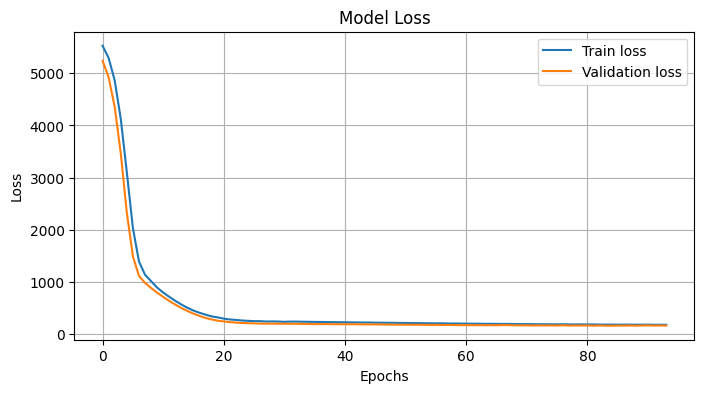

In [75]:
plt.figure(figsize=(8, 4))
plt.plot(base_seq_history.history['loss'], label='Train loss')
plt.plot(base_seq_history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

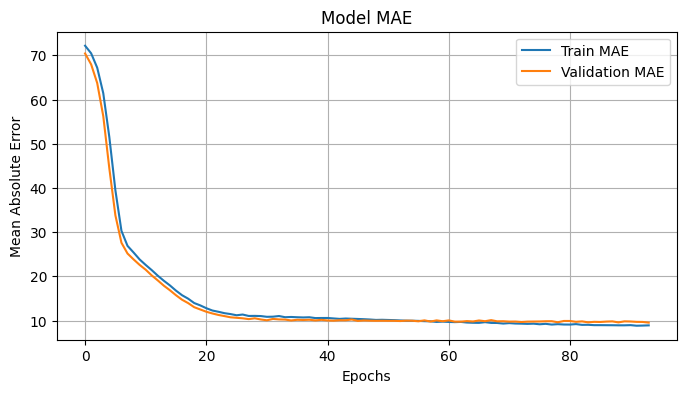

In [38]:
plt.figure(figsize=(8, 4))
plt.plot(base_seq_history.history['mae'], label='Train MAE')
plt.plot(base_seq_history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

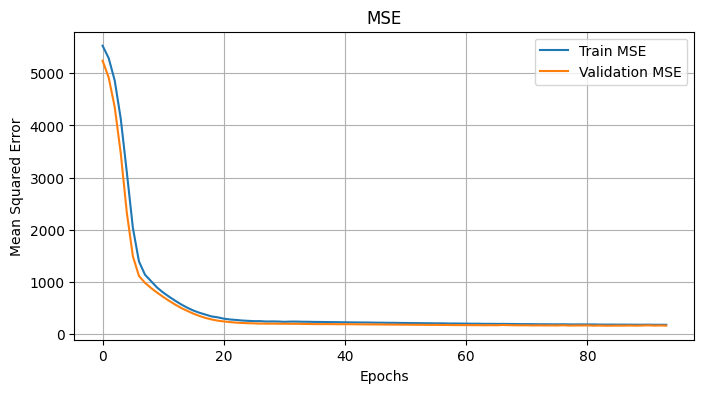

In [72]:
plt.figure(figsize=(8, 4))
plt.plot(base_seq_history.history['mse'], label='Train MSE')
plt.plot(base_seq_history.history['val_mse'], label='Validation MSE')
plt.title('MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

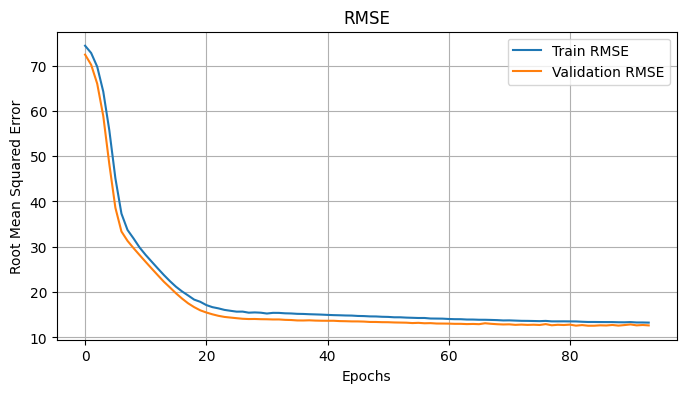

In [73]:
plt.figure(figsize=(8, 4))
plt.plot(base_seq_history.history['rmse'], label='Train RMSE')
plt.plot(base_seq_history.history['val_rmse'], label='Validation RMSE')
plt.title('RMSE')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

From all the 4 plots above, we can see that between Loss, MAE, MSE, and RMSE, only MAE that the validation results showing a little bigger than the training result. But it’s okay, because all of them showing both decreasing sharply in the beginning and stabilized after the 10th epoch. These 2 close lines indicates that the model learns well without overfitting .

In [76]:
# show R2
y_pred = baseline_sequential_model.predict(x_test)
r2_score(y_test, y_pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


0.5143323042227429

As we can see from the R2 score above, this models are quite good in explaining the data variation which is around 51% (>50%).

## Baseline Functional Model

In [42]:
inputs = Input(shape=(n,))

x = Dense(n * 2, activation='relu')(inputs)  # input and first hidden
x = Dense(n * 2, activation='relu')(x) # second hidden
x = Dense(n * 2, activation='relu')(x) # third hidden
outputs = Dense(1, activation='relu')(x) # output layer

In [43]:
# define functional model
baseline_functional_model = Model(inputs=inputs, outputs=outputs)

In [44]:
# compiling model
baseline_functional_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse', RootMeanSquaredError(name='rmse')]
)

baseline_functional_model.summary()  # summary

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 34)             │           612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 34)             │         1,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 34)             │         1,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            35 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,027 (11.82 KB)

 Trainable params: 3,027 (11.82 KB)

 Non-trainable params: 0 (0.00 B)

Here, I’m defining the baseline functional model with 3 hidden layers. Then I’m compiling the model with MAE, MSE, and RMSE as the metric evaluation.

In [45]:
# early stop
stopping_early = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

base_func_history = baseline_functional_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=150,
    batch_size=32,
    verbose=1,
    callbacks=[stopping_early]
)

Epoch 1/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 5506.5718 - mae: 71.9444 - mse: 5506.5718 - rmse: 74.2045 - val_loss: 5268.6577 - val_mae: 70.5788 - val_mse: 5268.6577 - val_rmse: 72.5855
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5260.3105 - mae: 70.1862 - mse: 5260.3105 - rmse: 72.5250 - val_loss: 4772.5293 - val_mae: 66.8286 - val_mse: 4772.5293 - val_rmse: 69.0835
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4817.3130 - mae: 66.8453 - mse: 4817.3130 - rmse: 69.3859 - val_loss: 3803.2371 - val_mae: 59.1725 - val_mse: 3803.2371 - val_rmse: 61.6704
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3802.1306 - mae: 57.7316 - mse: 3802.1306 - rmse: 61.6160 - val_loss: 2463.6414 - val_mae: 45.5897 - val_mse: 2463.6414 - val_rmse: 49.6351
Epoch 5/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2355.0652 - mae: 41.0154 - mse: 2355.0652 - rmse: 48.5064 - val_loss: 1503.8822 - val_mae: 32.7037 - val_mse: 1503.8822 - val_rmse: 38.7799
Epoc

Here, i'm also using early stopping, because as i'm choosing a quite big number of epochs, therefore it's better to use this method to prevent overfitting and saves more time. And then i'm training the data with applying the early stop method.

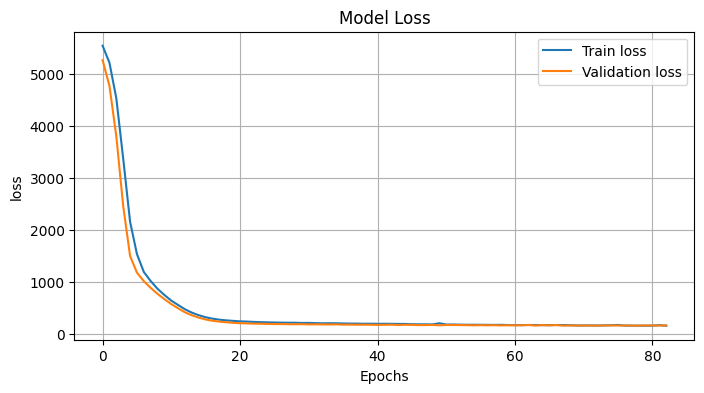

In [77]:
plt.figure(figsize=(8, 4))
plt.plot(base_func_history.history['loss'], label='Train loss')
plt.plot(base_func_history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

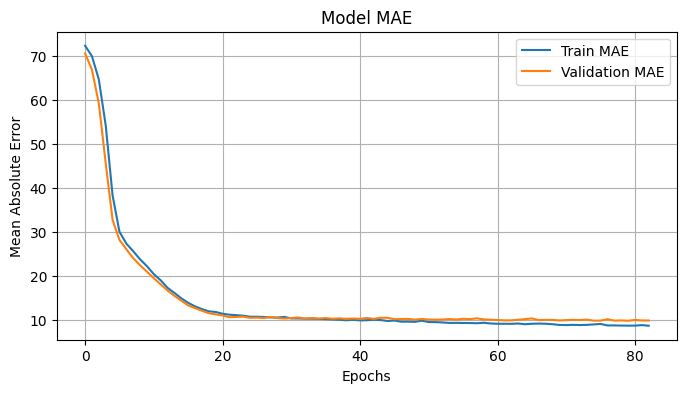

In [47]:
plt.figure(figsize=(8, 4))
plt.plot(base_func_history.history['mae'], label='Train MAE')
plt.plot(base_func_history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

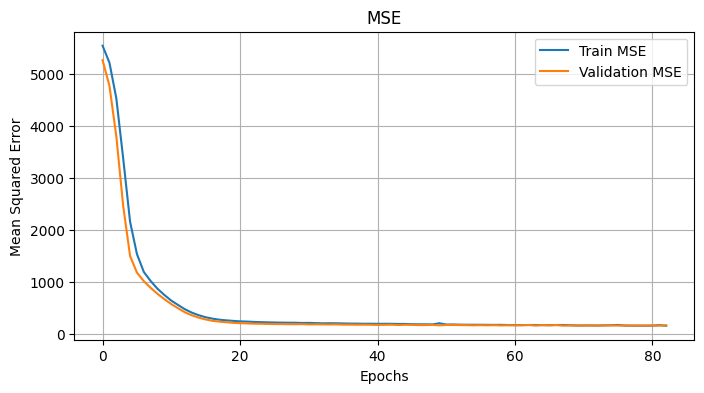

In [78]:
plt.figure(figsize=(8, 4))
plt.plot(base_func_history.history['mse'], label='Train MSE')
plt.plot(base_func_history.history['val_mse'], label='Validation MSE')
plt.title('MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

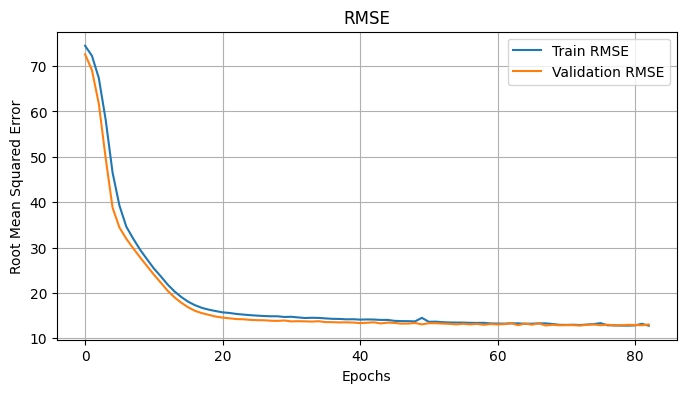

In [79]:
plt.figure(figsize=(8, 4))
plt.plot(base_func_history.history['rmse'], label='Train RMSE')
plt.plot(base_func_history.history['val_rmse'], label='Validation RMSE')
plt.title('RMSE')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

As we can see, all of these 4 plots above are quite similar with the baseline model, which means the data learns pretty good in discovering the patterns without overfitting.

In [50]:
# show R2
y_pred = baseline_functional_model.predict(x_test)
r2_score(y_test, y_pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


0.5463497264973285

This model is able to explain approximately 54.6% of the variance in the target data which is better than the baseline sequential model.

# 1.C

## Modified Sequential Model (Fine Tuning)

In [51]:
n = x_train.shape[1]  # input layer size
n

17

In [52]:
# modified sequential
modified_sequential_model = keras.Sequential([
    layers.Dense(n * 4, activation='relu', input_shape=(n,)), # input layer and first hidden
    layers.Dense(n * 4, activation='relu'),  # second hidden
    layers.Dense(n * 4, activation='relu'),  # third hidden
    layers.Dense(1, activation='relu')  # output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
# compile model
modified_sequential_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse', RootMeanSquaredError(name='rmse')]
)

modified_sequential_model.summary()  # summary

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 68)             │         1,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 68)             │         4,692 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 68)             │         4,692 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            69 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,677 (41.71 KB)

 Trainable params: 10,677 (41.71 KB)

 Non-trainable params: 0 (0.00 B)

Here, it's quite the same like the baseline, the difference is i'm just adding another layer and changing the neuron size.

In [54]:
# early stop
stopping_early = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

mods_seq_history = modified_sequential_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=150,
    batch_size=32,
    verbose=1,
    callbacks=[stopping_early]
)

Epoch 1/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 5511.1572 - mae: 72.0993 - mse: 5511.1572 - rmse: 74.2357 - val_loss: 4969.8667 - val_mae: 68.3120 - val_mse: 4969.8667 - val_rmse: 70.4973
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4764.3682 - mae: 66.5426 - mse: 4764.3682 - rmse: 69.0136 - val_loss: 3146.3809 - val_mae: 53.1152 - val_mse: 3146.3809 - val_rmse: 56.0926
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2882.1499 - mae: 45.5638 - mse: 2882.1499 - rmse: 53.6268 - val_loss: 1442.6405 - val_mae: 30.7856 - val_mse: 1442.6405 - val_rmse: 37.9821
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1485.7131 - mae: 31.0112 - mse: 1485.7131 - rmse: 38.5189 - val_loss: 1045.0106 - val_mae: 26.1736 - val_mse: 1045.0106 - val_rmse: 32.3266
Epoch 5/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1013.4286 - mae: 25.5529 - mse: 1013.4286 - rmse: 31.7886 - val_loss: 807.6632 - val_mae: 22.6414 - val_mse: 807.6632 - val_rmse: 28.4194
Epo

Training the data with early stopping method


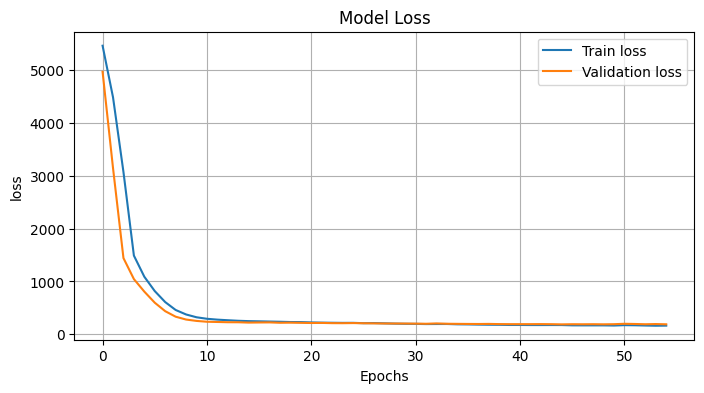

In [80]:
plt.figure(figsize=(8, 4))
plt.plot(mods_seq_history.history['loss'], label='Train loss')
plt.plot(mods_seq_history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

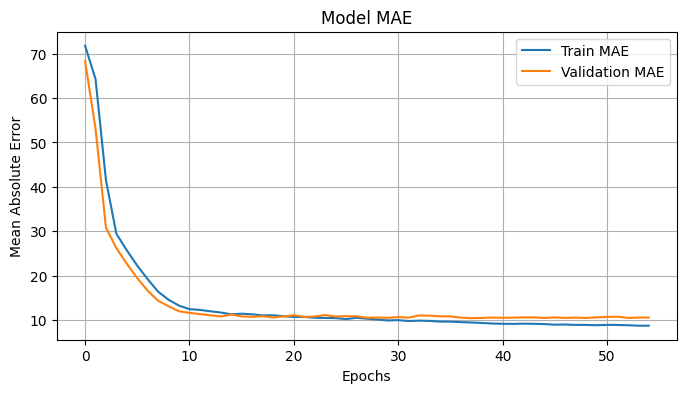

In [56]:
plt.figure(figsize=(8, 4))
plt.plot(mods_seq_history.history['mae'], label='Train MAE')
plt.plot(mods_seq_history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

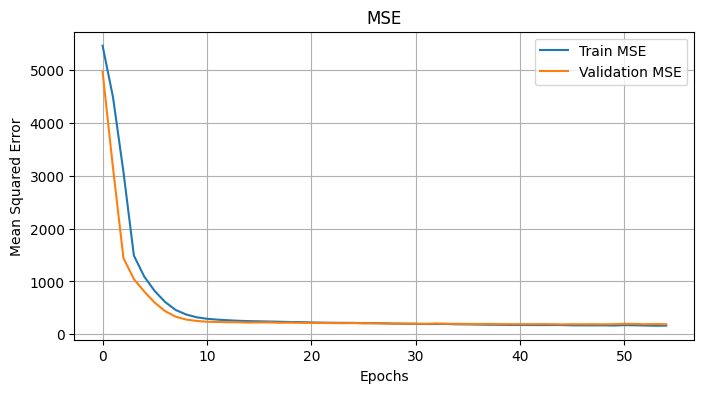

In [81]:
plt.figure(figsize=(8, 4))
plt.plot(mods_seq_history.history['mse'], label='Train MSE')
plt.plot(mods_seq_history.history['val_mse'], label='Validation MSE')
plt.title('MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


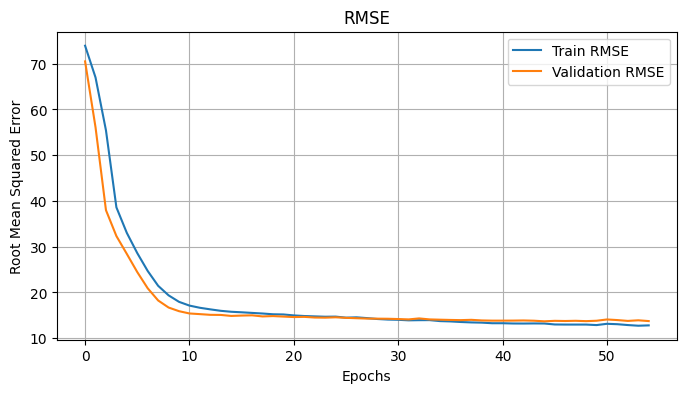

In [82]:
plt.figure(figsize=(8, 4))
plt.plot(mods_seq_history.history['rmse'], label='Train RMSE')
plt.plot(mods_seq_history.history['val_rmse'], label='Validation RMSE')
plt.title('RMSE')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

Compared to the baseline, this model shows similar performance but more efficient, with faster convergence and the validation that is even slightly lower than the training. This indicates that the model not only learns well but also has strong generalization without overfitting.

In [59]:
# show R2
y_pred = modified_sequential_model.predict(x_test)
r2_score(y_test, y_pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


0.45268321484815544

The value of 0.452 means the model only explains 45.2% of the target variation, leaving 54.8% unexplained, which could be due to missing factors or noise in the data.

## Modified Functional Model (Fine Tuning)

In [60]:
inputs = Input(shape=(n,))

x = Dense(n * 4, activation='relu')(inputs)  # input and first hidden
x = Dense(n * 4, activation='relu')(x) # second hidden
x = Dense(n * 4, activation='relu')(x) # third hidden
x = Dense(n * 4, activation='relu')(x) # fourth hidden
outputs = Dense(1, activation='relu')(x) # output layer

In [61]:
# modified functional
modified_functional_model = Model(inputs=inputs, outputs=outputs)

In [62]:
# compiling model
modified_functional_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse', RootMeanSquaredError(name='rmse')]
)

modified_functional_model.summary()  # summary

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 68)             │         1,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 68)             │         4,692 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 68)             │         4,692 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 68)             │         4,692 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            69 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,369 (60.04 KB)

 Trainable params: 15,369 (60.04 KB)

 Non-trainable params: 0 (0.00 B)

It's pretty similar like the baseline, i only added another layer and change the neuron size 2 times bigger than the baseline model.

In [63]:
# early stop
stopping_early = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

mods_func_history = modified_functional_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=150,
    batch_size=32,
    verbose=1,
    callbacks=[stopping_early]
)

Epoch 1/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 5419.9922 - mae: 71.2942 - mse: 5419.9922 - rmse: 73.6129 - val_loss: 4797.7578 - val_mae: 66.9643 - val_mse: 4797.7578 - val_rmse: 69.2658
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4667.7222 - mae: 64.9826 - mse: 4667.7222 - rmse: 68.2987 - val_loss: 2573.6836 - val_mae: 47.3257 - val_mse: 2573.6836 - val_rmse: 50.7315
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2752.9443 - mae: 43.0524 - mse: 2752.9443 - rmse: 51.8321 - val_loss: 1184.0483 - val_mae: 25.7687 - val_mse: 1184.0483 - val_rmse: 34.4100
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1244.9657 - mae: 27.3678 - mse: 1244.9657 - rmse: 35.1981 - val_loss: 801.5773 - val_mae: 22.7118 - val_mse: 801.5773 - val_rmse: 28.3121
Epoch 5/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 770.1835 - mae: 22.5400 - mse: 770.1835 - rmse: 27.7411 - val_loss: 570.9568 - val_mae: 19.1253 - val_mse: 570.9568 - val_rmse: 23.8947
Epoch 6/15

Doing the data train using early stopping method

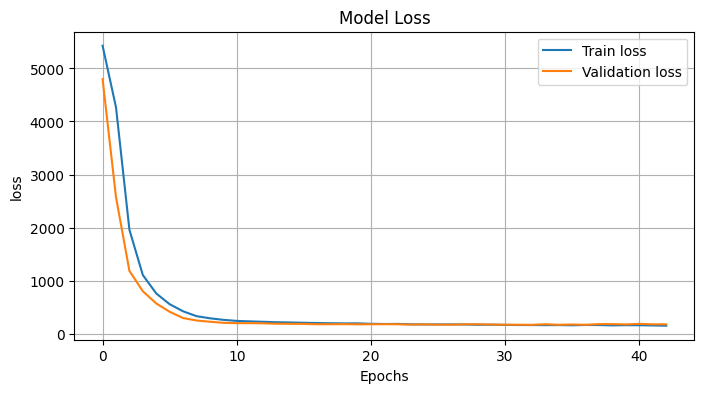

In [83]:
plt.figure(figsize=(8, 4))
plt.plot(mods_func_history.history['loss'], label='Train loss')
plt.plot(mods_func_history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

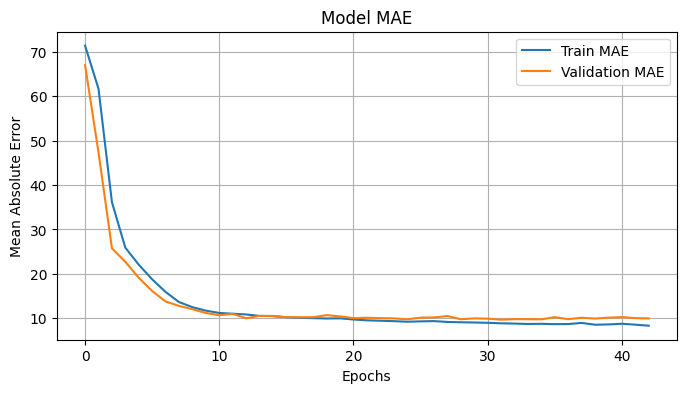

In [65]:
plt.figure(figsize=(8, 4))
plt.plot(mods_func_history.history['mae'], label='Train MAE')
plt.plot(mods_func_history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

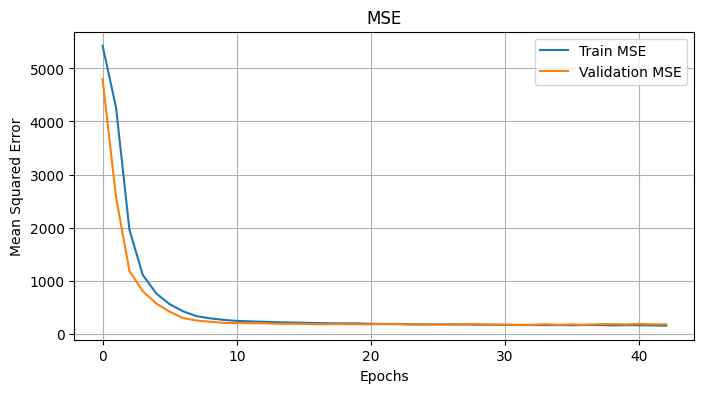

In [84]:
plt.figure(figsize=(8, 4))
plt.plot(mods_func_history.history['mse'], label='Train MSE')
plt.plot(mods_func_history.history['val_mse'], label='Validation MSE')
plt.title('MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


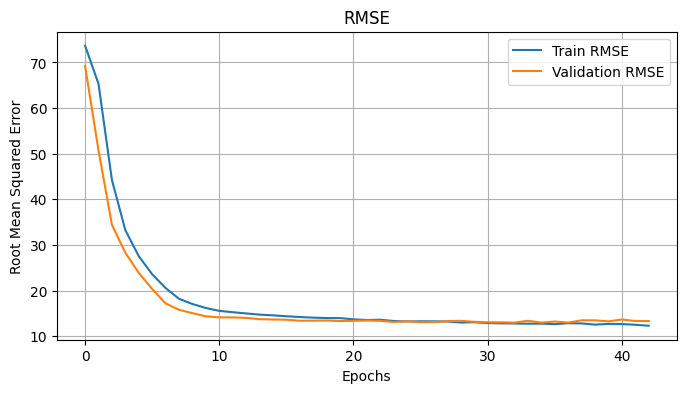

In [85]:
plt.figure(figsize=(8, 4))
plt.plot(mods_func_history.history['rmse'], label='Train RMSE')
plt.plot(mods_func_history.history['val_rmse'], label='Validation RMSE')
plt.title('RMSE')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

The modified model shows similar performance to the baseline but it's more efficient. The loss drops faster, and it trains in fewer epochs. The validation is also slightly lower than the training , which means the model generalizes well and didn't overfit.

In [68]:
# show R2
y_pred = modified_functional_model.predict(x_test)
r2_score(y_test, y_pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


0.4925202988383254

The  model r2 score is around 49 almost to 50 % which is quite good in explaining almost half of the data variability.

# 1.D

## Evaluation

In [69]:
# Evaluating the models performance based on MAE, MSE, RMSE, and r2
def evaluate_keras_models(models, x_test, y_test):
    performance_records  = []

    for name, model in models.items():
        y_pred = model.predict(x_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        performance_records .append({
            "Model": name,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R2": r2
        })

    return pd.DataFrame(performance_records)

In [70]:
model_variants = {  # defining the models
    "Baseline Sequential": baseline_sequential_model,
    "Baseline Functional": baseline_functional_model,
    "Modified Sequential": modified_sequential_model,
    "Modified Functional": modified_functional_model
}

In [71]:
# creating the report results
regression_report = evaluate_keras_models(model_variants, x_test, y_test)
print(regression_report)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
                 Model       MAE         MSE       RMSE        R2
0  Baseline Sequential  9.088571  140.619382  11.858304  0.514332
1  Baseline Functional  8.993665  131.349113  11.460764  0.546350
2  Modified Sequential  9.824947  158.469152  12.588453  0.452683
3  Modified Functional  9.342210  146.934792  12.121666  0.492520


As we can see from these report, there are four model variants were compared using MAE, MSE, RMSE, and R². MAE tells the average difference between the predicted and actual values, while MSE and RMSE focus more on punishing larger errors. R2 shows how well the model explains the data variability. Based on the results, the Baseline Functional model gave the best outcome, because it had the lowest errors (MAE, MSE, RMSE) and the highest R² score (0.546). This means the Baseline Functional model was the most accurate at predicting compared to the others. On the other hand, both Modified models didn’t perform as well by showing higher errors and lower R2 scores.